Equation to solve $ \frac{d^2x}{dt^2} = -\gamma\frac{dx}{dt} + 2ax + 4bx^3 + F_0cos(\omega t)$

Reduce to 2 first order ODEs by setting :

$ \frac{dx}{dt} = v $

$ \frac{dv}{dt} = -\gamma\frac{dx}{dt} + 2ax + 4bx^3 + F_0cos(\omega t) $


In [438]:
import numpy as np

#Define our functions here
def func(t, x, v, gamma, a, b, F0, omega):

    dxdt = v
    dvdt = -gamma*v + 2*a*x - 4*b*x**3 + F0*np.cos(omega*t)

    return dxdt, dvdt

In [439]:
#Runge Kutta fourth order algorithim
def rk4(func, t0, x0, v0, gamma, a, b, F0, omega, h, t_end):

    #Initial conditions
    t = t0
    x = x0
    v = v0

    #Arrays to store time and position valuesS
    t_array = [t0]
    x_array = [x0]
    v_array = [v0]

    while t <= t_end:

        k1x, k1v = func(t, x, v, gamma, a, b, F0, omega)
        k2x, k2v = func(t + (h/2), x + (h/2)*k1x, v + (h/2)*k1v, gamma, a, b, F0, omega)
        k3x, k3v = func(t + (h/2), x + (h/2)*k2x, v + (h/2)*k2v, gamma, a, b, F0, omega)
        k4x, k4v = func(t + h, x + h*k3x, v + h*k3v, gamma, a, b, F0, omega)

        x = x + h*(k1x + 2*k2x + 2*k3x + k4x)/6
        v = v + h*(k1v + 2*k2v + 2*k3v + k4v)/6
        t = t + h

        t_array.append(t)
        v_array.append(v)
        x_array.append(x)
        
    return t_array, x_array, v_array

In [440]:
#Constants and starting conditions
t0 = 0
x0 = 0.5001
v0 = 0
gamma = 0.1
a = 1/4
b = 1/2
F0 = 2.0
omega = 2.4

#Time step and end of time
h = 0.01
t_end = 100

Text(0.5, 0, 'v')

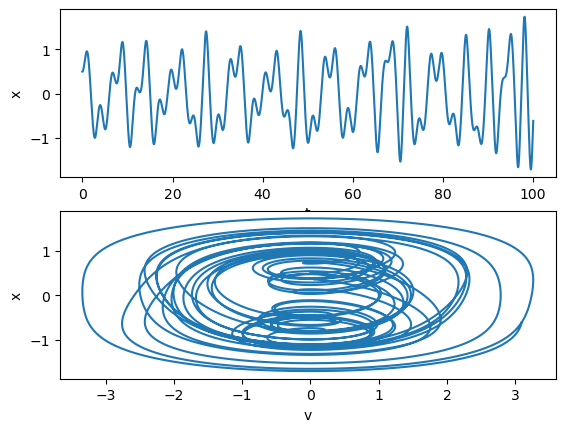

In [441]:
import matplotlib.pyplot as plt

#Run algorithim
t, x, v = rk4(func, t0, x0, v0, gamma, a, b, F0, omega, h, t_end)

#Plotting
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, x)
ax[0].set_ylabel('x')
ax[0].set_xlabel('t')
ax[1].plot(v, x)
ax[1].set_ylabel('x')
ax[1].set_xlabel('v')